### Courtesy of Mastering OpenCV 4 with Pythonby Alberto Fernandez Villan

In [1]:
import cv2
import numpy as np

In [7]:
def get_one_contour():
    cnts = [np.array([[[600, 320]], [[563, 460]], [[460, 562]], [[320, 600]], 
                       [[180, 563]], [[78, 460]], [[40, 320]], [[77, 180]], [[179, 78]], [[319, 40]], 
                       [[459, 77]], [[562, 179]]], dtype=np.int32)]
    return cnts

In [8]:
contours = get_one_contour()
print("'detected' contours: '{}'".format(len(contours)))
print("contour shape: '{}'".format(contours[0].shape))

'detected' contours: '1'
contour shape: '(12, 1, 2)'


In [69]:
image = cv2.imread("C:/Users/Business Intelli/Desktop/cats vs dogs/train/dogs/dog.21.jpg", 0)
print('Image shape:', image.shape)
print('Image dtype:', image.dtype)
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

Image shape: (499, 415)
Image dtype: uint8


In [72]:
ret, thresh = cv2.threshold(image, 127, 100, 2)
contours, hierarchy = cv2.findContours(thresh, 1, 2)


cnt = contours[1]
M = cv2.moments(cnt)
print( M )

{'m00': 2.0, 'm10': 638.0, 'm01': 990.0, 'm20': 203522.3333333333, 'm11': 315810.0, 'm02': 490050.3333333333, 'm30': 64923837.0, 'm21': 100743555.0, 'm12': 156326056.33333334, 'm03': 242575245.0, 'mu20': 0.3333333333139308, 'mu11': 0.0, 'mu02': 0.3333333333139308, 'mu30': 1.4901161193847656e-08, 'mu21': 9.604264050722122e-09, 'mu12': 1.6123522073030472e-08, 'mu03': 2.9802322387695312e-08, 'nu20': 0.0833333333284827, 'nu11': 0.0, 'nu02': 0.0833333333284827, 'nu30': 2.634178031930877e-09, 'nu21': 1.6978100596429481e-09, 'nu12': 2.850262948612707e-09, 'nu03': 5.268356063861754e-09}


In [56]:
if M["m00"] != 0:
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
else:
    # set values as what you need in the situation
    cX, cY = 0, 0

In [57]:
area = cv2.contourArea(cnt)

In [58]:
area

6.0

In [59]:
perimeter = cv2.arcLength(cnt,True)

In [60]:
perimeter

9.656854152679443

In [61]:
k = cv2.isContourConvex(cnt)

In [62]:
x,y,w,h = cv2.boundingRect(cnt)
rect_image = cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)



In [161]:
cv2.imshow('contours', rect_image)
cv2.waitKey()
cv2.destroyAllWindows()

### Thresholding

In [125]:
image29 = cv2.imread("C:/Users/Business Intelli/Desktop/cats vs dogs/train/dogs/dog.29.jpg", 0)
print('Image shape:', image29.shape)
print('Image dtype:', image29.dtype)
cv2.imshow('image', image29)
cv2.waitKey()
cv2.destroyAllWindows()

Image shape: (376, 500)
Image dtype: uint8


In [102]:
# Simple Binary Thresholding technique
thresh1, mask  = cv2.threshold(image29, 125, 1, cv2.THRESH_BINARY)

In [90]:
import matplotlib.pyplot as plt
print('Threshold used:', thresh1)

Threshold used: 50.0


In [115]:
# adaptive thresholding
adapt_mask = cv2.adaptiveThreshold(image29, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 10)

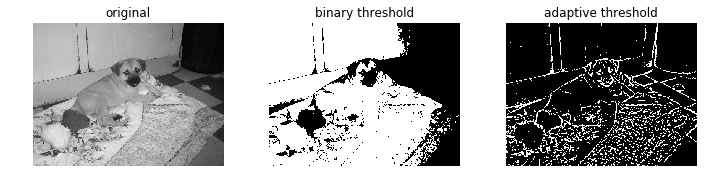

In [116]:
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.axis('off')
plt.title('original')
plt.imshow(image29, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.title('binary threshold')
plt.imshow(mask, cmap='gray')
plt.subplot(133)
plt.axis('off')
plt.title('adaptive threshold')
plt.imshow(adapt_mask, cmap='gray')
plt.tight_layout()
plt.show()

In [118]:
# creating a binary image with circle mask

circle_image = np.zeros((500, 500), np.uint8)
cv2.circle(circle_image, (250, 250), 100, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [119]:
# creating a binary image with rectangle mask
rect_image = np.zeros((500, 500), np.uint8)
cv2.rectangle(rect_image, (100, 100), (400, 250), 255, -1)# creating a binary image with circle mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [120]:
#Combine the circle and rectangle masks using a bitwise AND operator:

circle_and_rect_image = circle_image & rect_image

In [121]:
#Combine the circle and rectangle masks using a bitwise OR operator:
circle_or_rect_image = circle_image | rect_image

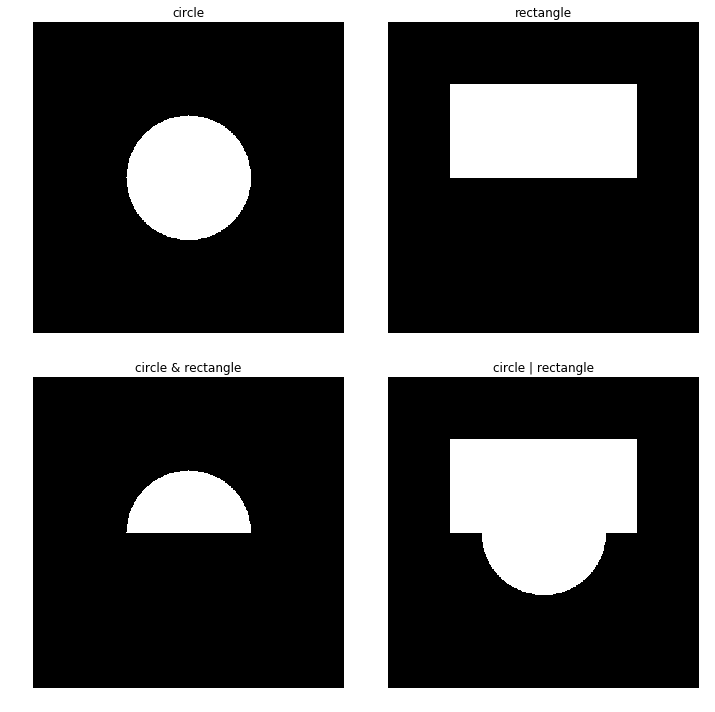

In [122]:
# Visualizing

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.axis('off')
plt.title('circle')
plt.imshow(circle_image, cmap='gray')
plt.subplot(222)
plt.axis('off')
plt.title('rectangle')
plt.imshow(rect_image, cmap='gray')
plt.subplot(223)
plt.axis('off')
plt.title('circle & rectangle')
plt.imshow(circle_and_rect_image, cmap='gray')
plt.subplot(224)
plt.axis('off')
plt.title('circle | rectangle')
plt.imshow(circle_or_rect_image, cmap='gray')
plt.tight_layout()
plt.show()

### Otsu Algorithm

In [138]:
# Reading the Algorithms

image31 = cv2.imread("C:/Users/Business Intelli/Desktop/cats vs dogs/train/dogs/dog.31.jpg", 0)
print('Image shape:', image31.shape)
print('Image dtype:', image31.dtype)
cv2.imshow('image', image31)
cv2.waitKey()
cv2.destroyAllWindows()

Image shape: (500, 297)
Image dtype: uint8


In [139]:
#Estimate the threshold using Otsu's method:
otsu_thr, otsu_mask = cv2.threshold(image31, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('Estimated threshold (Otsu):', otsu_thr)

Estimated threshold (Otsu): 90.0


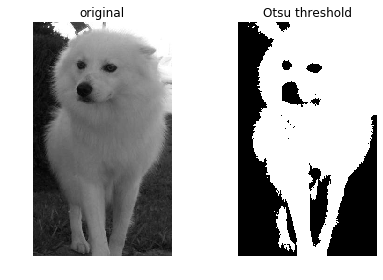

In [140]:
# Visualizing
plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(image31, cmap='gray')
plt.subplot(122)
plt.axis('off')
plt.title('Otsu threshold')
plt.imshow(otsu_mask, cmap='gray')
plt.tight_layout()
plt.show()

### Contours

In [142]:
#Finding the external and internal contours. Organizing them into a two-level hierarchy:
contours, hierarchy = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [150]:
# Preparing external contour mask
image_external = np.zeros(image31.shape, image31.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] == 0:
        cv2.drawContours(image_external, contours, i, 
        255, 0)

In [159]:
# Preparing internal contour mask
image_internal = np.zeros(image31.shape, image31.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(image_internal, contours, i, 
        255, -1)

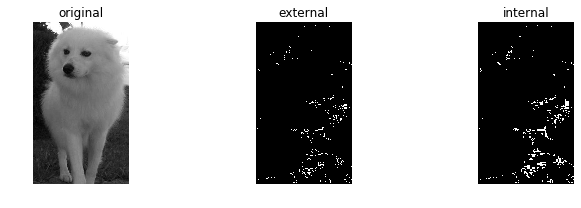

In [160]:
# Visuliazing results
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.axis('off')
plt.title('original')
plt.imshow(image31, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.title('external')
plt.imshow(image_external, cmap='gray')
plt.subplot(133)
plt.axis('off')
plt.title('internal')
plt.imshow(image_internal, cmap='gray')
plt.tight_layout()
plt.show()